In [52]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuratin of the plots we will create

In [53]:
df = pd.read_csv('movies.csv')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [55]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Data cleaning:

In [56]:
print('Percentage of missing rows for each column:')
for col in df.columns:
    pct_missing = np.mean(df[col].isna())
    print('{} - {}%'.format(col, pct_missing*100))

Percentage of missing rows for each column:
name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [57]:
# Due to the purposes of this analysis, we will have to drop all the rows with NaN
df.dropna(axis='rows', subset=('released', 'score', 'votes', 'writer', 'star', 'country', 'budget', 'gross', 'company', 'runtime'), inplace=True)

In [58]:
# Drop the 'year' column due to repetition in 'released'
df.drop(columns='year', inplace=True)

In [59]:
df[['release_date', 'release_country']] = df['released'].str.split('(', expand=True)
df['release_country'] = df['release_country'].str.replace(')', '')
df['release_date'] = pd.to_datetime(df['release_date'])

# Drop the 'released' column after splitting it
df.drop(columns='released', inplace=True)

C:\Users\Ivan\AppData\Local\Temp\ipykernel_19148\2819152342.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['release_country'] = df['release_country'].str.replace(')', '')


In [60]:
# Change data type of double columns
df['votes'] = df['votes'].astype(np.int64)
df['budget'] = df['budget'].astype(np.int64)
df['gross'] = df['gross'].astype(np.int64)
df['runtime'] = df['runtime'].astype(np.int64)

In [61]:
# Renaming columns for clear representation
df.rename(columns={'country': 'origin_country', 'gross': 'revenue'}, inplace=True)

In [62]:
# Cleaning 'rating' column according to Motion Picture Association film rating system
df.rating.value_counts()

R            2597
PG-13        1729
PG            907
G             111
Not Rated      44
Unrated        17
NC-17          12
TV-MA           2
Approved        1
X               1
Name: rating, dtype: int64

In [63]:
df['rating'] = df['rating'].replace('Not Rated', np.nan)
df['rating'] = df['rating'].replace('Unrated', np.nan)
df['rating'] = df['rating'].str.replace('TV-MA', 'PG')
df['rating'] = df['rating'].str.replace('Approved', 'G')
df['rating'] = df['rating'].str.replace('X', 'NC-17')
df.dropna(axis='rows', subset='rating', inplace=True)

In [64]:
# Cleaned dataset:
df

,name,rating,genre,score,votes,director,writer,star,origin_country,budget,revenue,company,runtime,release_date,release_country
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980-06-20,United States
3,Airplane!,PG,Comedy,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980-07-02,United States
4,Caddyshack,R,Comedy,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980-07-25,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,The Invisible Man,R,Drama,7.1,186000,Leigh Whannell,Leigh Whannell,Elisabeth Moss,Canada,7000000,143151000,Universal Pictures,124,2020-02-28,United States
7648,Bad Boys for Life,R,Action,6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020-01-17,United States
7649,Sonic the Hedgehog,PG,Action,6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020-02-14,United States
7650,Dolittle,PG,Adventure,5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,2020-01-17,United States


Correlation between numerical columns:

<AxesSubplot:xlabel='budget', ylabel='revenue'>

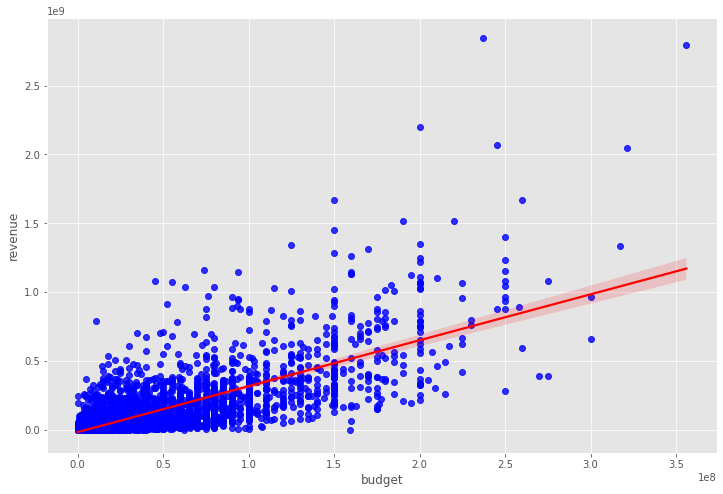

In [65]:
sns.regplot(x='budget', y='revenue', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

In [66]:
# Correlation
df.corr(method='pearson')

,score,votes,budget,revenue,runtime
score,1.000000,0.477797,0.076368,0.226541,0.414654
votes,0.477797,1.000000,0.439472,0.615634,0.358119
budget,0.076368,0.439472,1.000000,0.739377,0.323430
revenue,0.226541,0.615634,0.739377,1.000000,0.279761
runtime,0.414654,0.358119,0.323430,0.279761,1.000000


In [67]:
# High correlation between budget and revenue

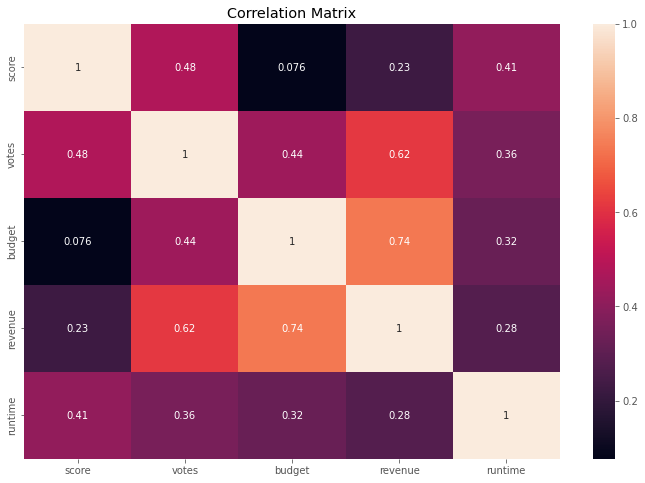

In [68]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

Correlation including categorical columns:

In [69]:
df_numerized = df

In [70]:
df_numerized.dtypes

name                       object
rating                     object
genre                      object
score                     float64
votes                       int64
                        ...      
revenue                     int64
company                    object
runtime                     int64
release_date       datetime64[ns]
release_country            object
Length: 15, dtype: object

In [72]:
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [73]:
df_numerized

,name,rating,genre,score,votes,director,writer,star,origin_country,budget,revenue,company,runtime,release_date,release_country
0,The Shining,4,6,8.4,927000,1767,2799,684,44,19000000,46998772,1391,146,1980-06-13,46
1,The Blue Lagoon,4,1,5.8,65000,1554,1143,210,45,4500000,58853106,436,104,1980-07-02,46
2,Star Wars: Episode V - The Empire Strikes Back,2,0,8.7,1200000,745,1791,1133,45,18000000,538375067,919,124,1980-06-20,46
3,Airplane!,2,4,7.7,221000,873,1391,1442,45,3500000,83453539,1077,88,1980-07-02,46
4,Caddyshack,4,4,7.3,108000,710,346,267,45,6000000,39846344,1052,98,1980-07-25,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,The Invisible Man,4,6,7.1,186000,1144,1794,489,6,7000000,143151000,1362,124,2020-02-28,46
7648,Bad Boys for Life,4,0,6.6,140000,16,2360,1771,45,90000000,426505244,436,124,2020-01-17,46
7649,Sonic the Hedgehog,2,0,6.5,102000,837,2279,143,45,85000000,319715683,1077,99,2020-02-14,46
7650,Dolittle,2,1,5.6,53000,1781,2794,1438,45,175000000,245487753,1362,101,2020-01-17,46


In [83]:
df_numerized['year'] = df_numerized.release_date.dt.year

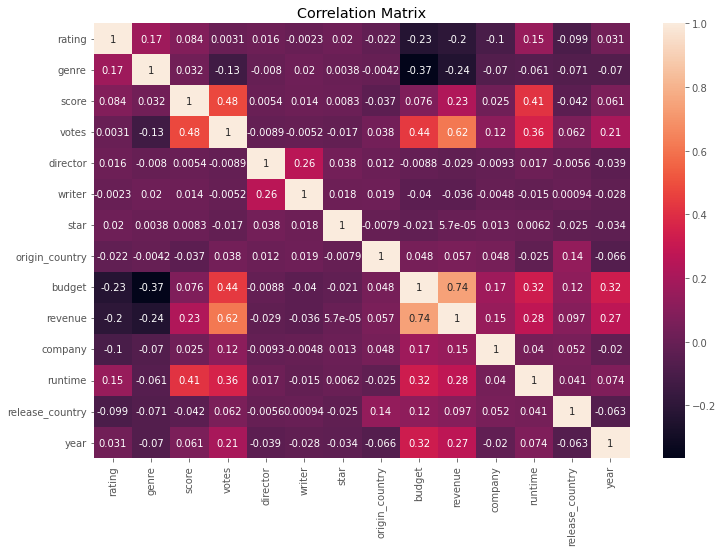

In [84]:
correlation_matrix_num = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix_num, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [75]:
df_numerized.corr()

,rating,genre,score,votes,director,writer,star,origin_country,budget,revenue,company,runtime,release_country
rating,1.000000,0.168302,0.084074,0.003115,0.016349,-0.002282,0.020322,-0.021529,-0.230782,-0.203315,-0.100445,0.150468,-0.098737
genre,0.168302,1.000000,0.031992,-0.134915,-0.008022,0.019952,0.003785,-0.004205,-0.365676,-0.241285,-0.070153,-0.060560,-0.071277
score,0.084074,0.031992,1.000000,0.477797,0.005398,0.014194,0.008257,-0.036640,0.076368,0.226541,0.024502,0.414654,-0.041727
votes,0.003115,-0.134915,0.477797,1.000000,-0.008865,-0.005157,-0.016537,0.037847,0.439472,0.615634,0.118214,0.358119,0.062208
director,0.016349,-0.008022,0.005398,-0.008865,1.000000,0.260257,0.038135,0.011545,-0.008839,-0.029073,-0.009302,0.017243,-0.005589
...,...,...,...,...,...,...,...,...,...,...,...,...,...
budget,-0.230782,-0.365676,0.076368,0.439472,-0.008839,-0.039851,-0.021316,0.047524,1.000000,0.739377,0.168412,0.323430,0.123264
revenue,-0.203315,-0.241285,0.226541,0.615634,-0.029073,-0.036036,0.000057,0.057396,0.739377,1.000000,0.149025,0.279761,0.097378
company,-0.100445,-0.070153,0.024502,0.118214,-0.009302,-0.004787,0.013009,0.047785,0.168412,0.149025,1.000000,0.039816,0.052395
runtime,0.150468,-0.060560,0.414654,0.358119,0.017243,-0.014703,0.006182,-0.024723,0.323430,0.279761,0.039816,1.000000,0.041264


In [85]:
corr_mat = df_numerized.corr()

corr_pairs = corr_mat.unstack()
corr_pairs

rating  rating             1.000000
        genre              0.168302
        score              0.084074
        votes              0.003115
        director           0.016349
                             ...   
year    revenue            0.270616
        company           -0.020267
        runtime            0.073800
        release_country   -0.063259
        year               1.000000
Length: 196, dtype: float64

In [86]:
sorted_corr_pairs = corr_pairs.sort_values()
sorted_corr_pairs

genre            budget            -0.365676
budget           genre             -0.365676
revenue          genre             -0.241285
genre            revenue           -0.241285
budget           rating            -0.230782
                                      ...   
votes            votes              1.000000
score            score              1.000000
genre            genre              1.000000
release_country  release_country    1.000000
year             year               1.000000
Length: 196, dtype: float64

In [87]:
high_corr = sorted_corr_pairs[(sorted_corr_pairs) > 0.5]
high_corr

votes            revenue            0.615634
revenue          votes              0.615634
                 budget             0.739377
budget           revenue            0.739377
rating           rating             1.000000
                                      ...   
votes            votes              1.000000
score            score              1.000000
genre            genre              1.000000
release_country  release_country    1.000000
year             year               1.000000
Length: 18, dtype: float64

In [ ]:
# Votes and budget have the highest correlation to revenue
# Company doesn't matter